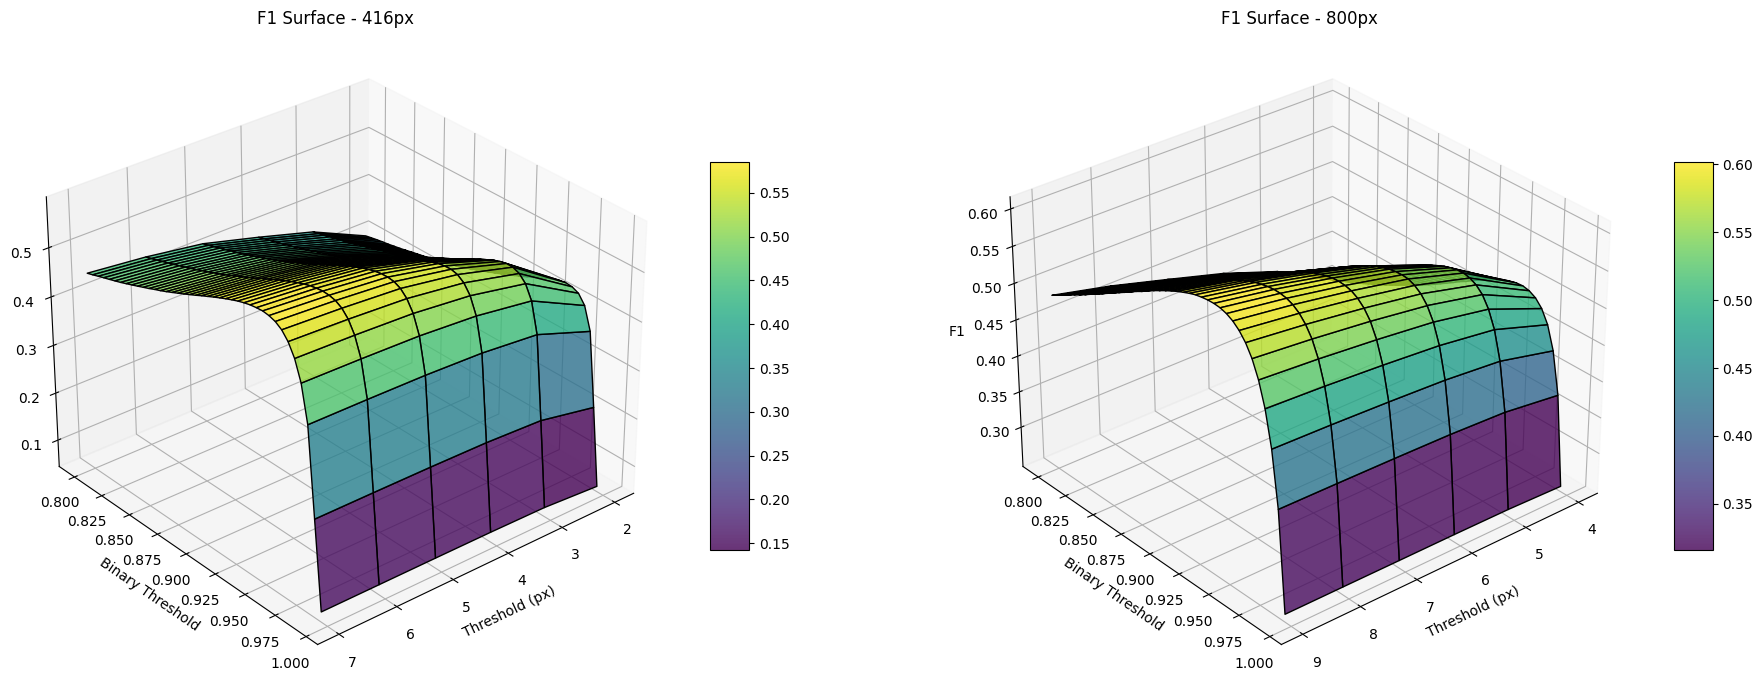

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# leggi i file salvati
f1_matrix416 = pd.read_csv(
    '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/beta=1/BCEL1dice/F1_matrix_unet.csv',
    header=None
).values

thresholds416 = np.loadtxt('/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/beta=1/BCEL1dice/F1_axis_pixel_thresholds.csv', delimiter=',')
binary416 = np.loadtxt('/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/beta=1/BCEL1dice/F1_axis_binary_thresholds.csv', delimiter=',')

f1_matrix800 = pd.read_csv(
    '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/beta=1/BCEL1dice/F1_matrix_unet.csv',
    header=None
).values

thresholds800 = np.loadtxt('/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/beta=1/BCEL1dice/F1_axis_pixel_thresholds.csv', delimiter=',')
binary800 = np.loadtxt('/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/beta=1/BCEL1dice/F1_axis_binary_thresholds.csv', delimiter=',')


def plot_F1_surfaces(
    thresholds416, binary416, f1_matrix416,
    thresholds800, binary800, f1_matrix800,
    save_img=False, filename="F1_surface_comparison.png"
):
    fig = plt.figure(figsize=(20, 7))

    # Primo plot (416)
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    X1, Y1 = np.meshgrid(thresholds416, binary416)
    surf1 = ax1.plot_surface(X1, Y1, f1_matrix416, cmap='viridis', edgecolor='k', alpha=0.8)
    ax1.set_xlabel('Threshold (px)')
    ax1.set_ylabel('Binary Threshold')
    ax1.set_zlabel('F1')
    ax1.set_title('F1 Surface - 416px')
    ax1.view_init(elev=30, azim=50)
    fig.colorbar(surf1, ax=ax1, shrink=0.6, aspect=10)

    # Secondo plot (800)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    X2, Y2 = np.meshgrid(thresholds800, binary800)
    surf2 = ax2.plot_surface(X2, Y2, f1_matrix800, cmap='viridis', edgecolor='k', alpha=0.8)
    ax2.set_xlabel('Threshold (px)')
    ax2.set_ylabel('Binary Threshold')
    ax2.set_zlabel('F1')
    ax2.set_title('F1 Surface - 800px')
    ax2.view_init(elev=30, azim=50)
    fig.colorbar(surf2, ax=ax2, shrink=0.6, aspect=10)

    plt.tight_layout()

    if save_img:
        plt.savefig(filename, dpi=300)

    plt.show()


plot_F1_surfaces(
    thresholds416, binary416, f1_matrix416,
    thresholds800, binary800, f1_matrix800,
    save_img=True, filename="F1_surface_comparison.png"
)

[416px] Max F1 = 0.546 at binary thr = 0.960
[800px] Max F1 = 0.595 at binary thr = 0.940


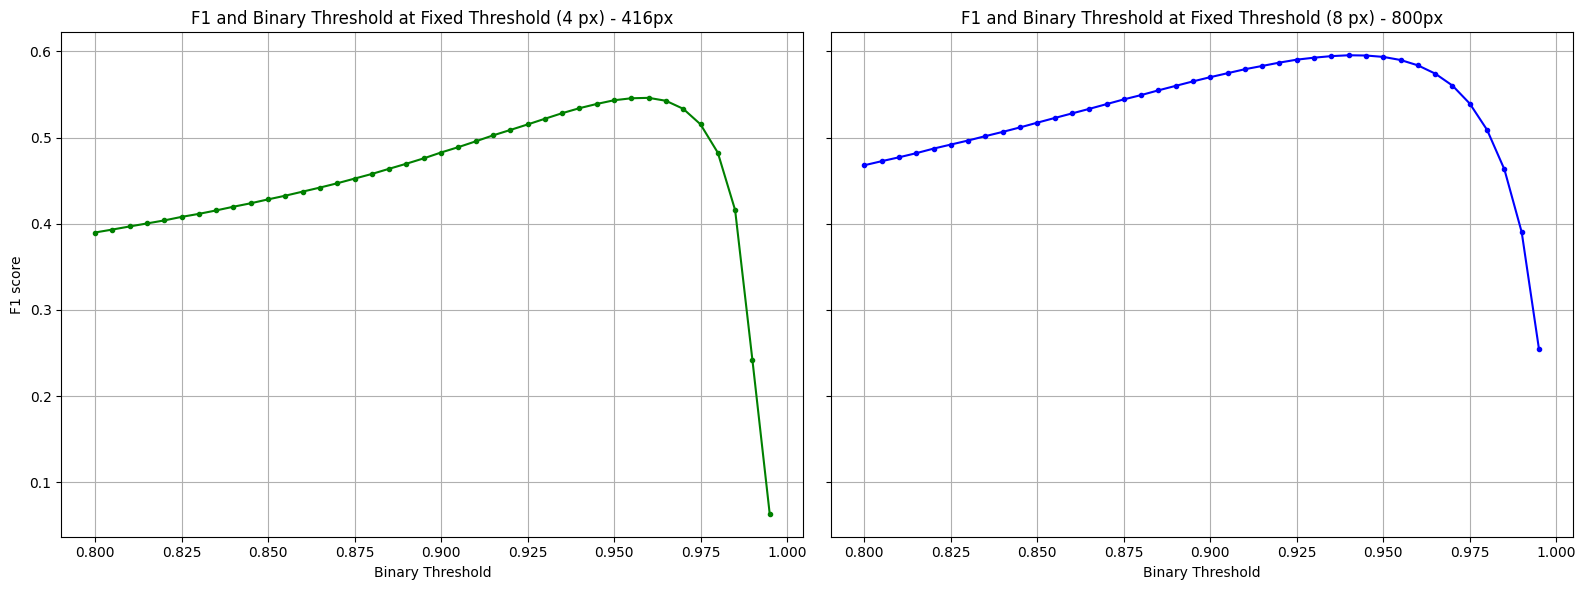

In [35]:
def plot_F1_vs_confidence(thresholds416, binary416, f1_matrix416,
                          thresholds800, binary800, f1_matrix800,
                          target_threshold416=4, target_threshold800=8):
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # --- 416px ---
    idx416 = np.where(thresholds416 == target_threshold416)[0][0]
    f1_at_threshold416 = f1_matrix416[:, idx416]
    axes[0].plot(binary416, f1_at_threshold416, marker='.', color='green')
    axes[0].set_xlabel("Binary Threshold")
    axes[0].set_ylabel("F1 score")
    axes[0].set_title(f"F1 and Binary Threshold at Fixed Threshold ({target_threshold416} px) - 416px")
    axes[0].grid(True)
    max_conf416 = binary416[np.argmax(f1_at_threshold416)]
    print(f'[416px] Max F1 = {np.max(f1_at_threshold416):.3f} at binary thr = {max_conf416:.3f}')

    # --- 800px ---
    idx800 = np.where(thresholds800 == target_threshold800)[0][0]
    f1_at_threshold800 = f1_matrix800[:, idx800]
    axes[1].plot(binary800, f1_at_threshold800, marker='.', color='blue')
    axes[1].set_xlabel("Binary Threshold")
    axes[1].set_title(f"F1 and Binary Threshold at Fixed Threshold ({target_threshold800} px) - 800px")
    axes[1].grid(True)
    max_conf800 = binary800[np.argmax(f1_at_threshold800)]
    print(f'[800px] Max F1 = {np.max(f1_at_threshold800):.3f} at binary thr = {max_conf800:.3f}')

    plt.tight_layout()

    plt.savefig('F1_vs_binary_threshold_comparison.png')

    plt.show()


plot_F1_vs_confidence(
    thresholds416, binary416, f1_matrix416,
    thresholds800, binary800, f1_matrix800
)

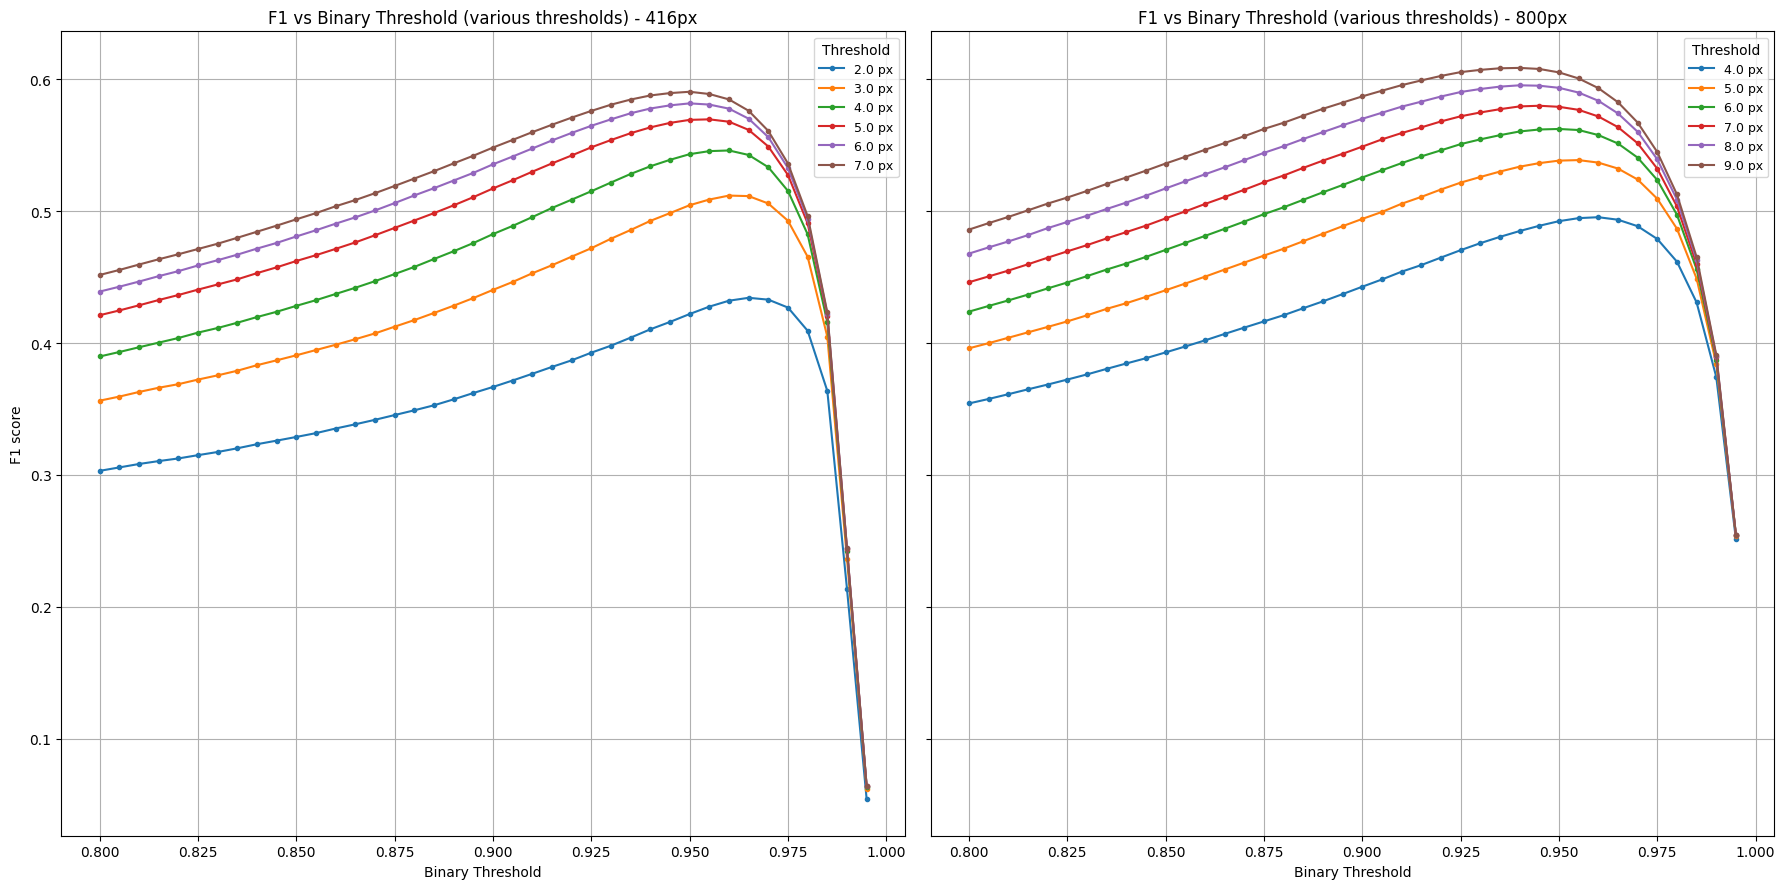

In [36]:
def plot_F1_vs_Binary_multi(thresholds416, binary416, f1_matrix416,
                                thresholds800, binary800, f1_matrix800):
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 9), sharey=True)

    # --- 416px ---
    for i, thr in enumerate(thresholds416):
        axes[0].plot(binary416, f1_matrix416[:, i], marker='.', label=f'{thr:.1f} px')
    axes[0].set_xlabel("Binary Threshold")
    axes[0].set_ylabel("F1 score")
    axes[0].set_title("F1 vs Binary Threshold (various thresholds) - 416px")
    axes[0].legend(title="Threshold", fontsize=9)
    axes[0].grid(True)

    # --- 800px ---
    for i, thr in enumerate(thresholds800):
        axes[1].plot(binary800, f1_matrix800[:, i], marker='.', label=f'{thr:.1f} px')
    axes[1].set_xlabel("Binary Threshold")
    axes[1].set_title("F1 vs Binary Threshold (various thresholds) - 800px")
    axes[1].legend(title="Threshold", fontsize=9)
    axes[1].grid(True)

    plt.tight_layout()
    
    plt.savefig('F1_vs_Binary_multi_comparison.png')
    
    plt.show()


plot_F1_vs_Binary_multi(
    thresholds416, binary416, f1_matrix416,
    thresholds800, binary800, f1_matrix800
)

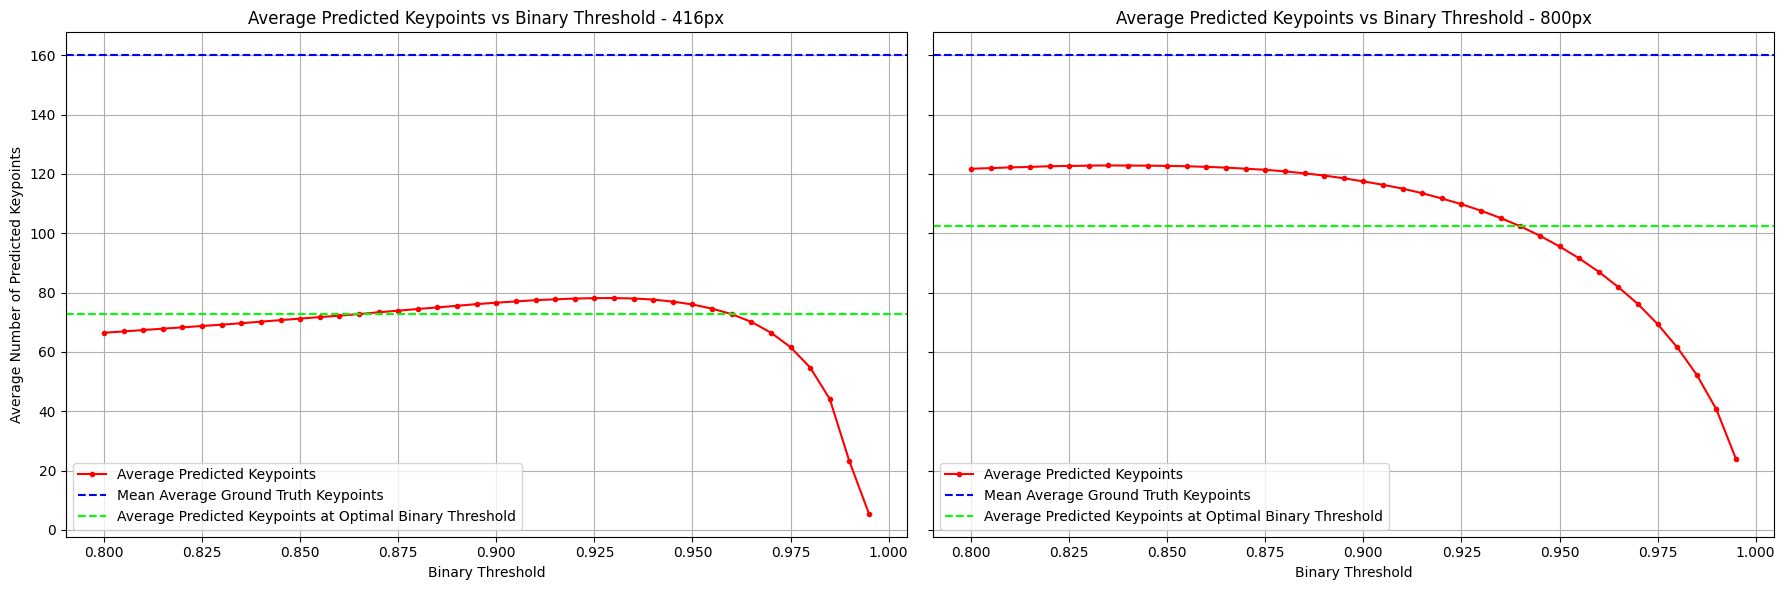

416px: Average predicted keypoints at optimal binary_thr = 72.73
800px: Average predicted keypoints at optimal binary_thr = 102.36


In [37]:
def plot_avg_keypoints(binary416, average_pred416, f1_at_thr416,
                       binary800, average_pred800, f1_at_thr800):

    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

    # --- 416px ---
    axes[0].plot(binary416, average_pred416, marker='.', color='red',
                 label='Average Predicted Keypoints')
    axes[0].axhline(y=160, color='blue', linestyle='--',
                    label='Mean Average Ground Truth Keypoints')
    axes[0].axhline(y=average_pred416[np.argmax(f1_at_thr416)], color='lime',
                    linestyle='--', label='Average Predicted Keypoints at Optimal Binary Threshold')
    axes[0].set_xlabel("Binary Threshold")
    axes[0].set_ylabel("Average Number of Predicted Keypoints")
    axes[0].set_title("Average Predicted Keypoints vs Binary Threshold - 416px")
    axes[0].legend()
    axes[0].grid(True)

    # --- 800px ---
    axes[1].plot(binary800, average_pred800, marker='.', color='red',
                 label='Average Predicted Keypoints')
    axes[1].axhline(y=160, color='blue', linestyle='--',
                    label='Mean Average Ground Truth Keypoints')
    axes[1].axhline(y=average_pred800[np.argmax(f1_at_thr800)], color='lime',
                    linestyle='--', label='Average Predicted Keypoints at Optimal Binary Threshold')
    axes[1].set_xlabel("Binary Threshold")
    axes[1].set_title("Average Predicted Keypoints vs Binary Threshold - 800px")
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    
    plt.savefig('Avg_pred_keypoints_vs_binary_thr_comparison.png')
    
    plt.show()

    print(f'416px: Average predicted keypoints at optimal binary_thr = {average_pred416[np.argmax(f1_at_thr416)]:.2f}')
    print(f'800px: Average predicted keypoints at optimal binary_thr = {average_pred800[np.argmax(f1_at_thr800)]:.2f}')



average_pred416 = pd.read_csv(
    '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/beta=1/BCEL1dice/avg_preds_per_binary_threshold.csv',
    header=None
).values.flatten()

average_pred800 = pd.read_csv(
    '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/beta=1/BCEL1dice/avg_preds_per_binary_threshold.csv',
    header=None
).values.flatten()


plot_avg_keypoints(binary416, average_pred416, f1_matrix416[:, np.where(thresholds416 == 4)[0][0]],
                   binary800, average_pred800, f1_matrix800[:, np.where(thresholds800 == 8)[0][0]])

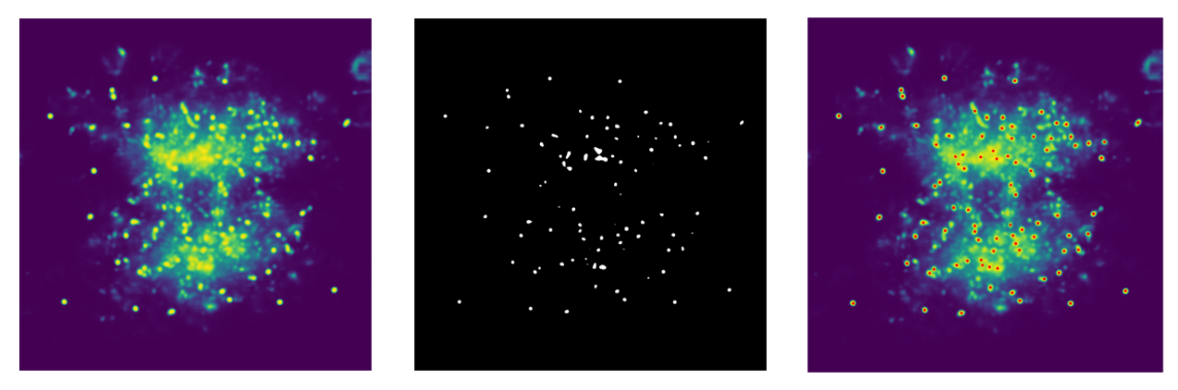

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

def affianca_immagini_due(img_path1, img_path2, height=400, save_path='comparison_images.png'):
    """
    Affianca due immagini PNG di dimensioni diverse, ridimensionandole
    alla stessa altezza, senza assi e senza bordi.
    
    Parametri:
    - img_path1, img_path2: percorsi delle immagini
    - height: altezza comune per tutte le immagini (pixel)
    - save_path: percorso dove salvare l'immagine risultante
    """
    # Carica le immagini
    imgs = [Image.open(p) for p in [img_path1, img_path2]]
    
    # Ridimensiona tutte le immagini alla stessa altezza
    resized_imgs = []
    for img in imgs:
        w, h = img.size
        new_w = int(w * height / h)
        resized_imgs.append(img.resize((new_w, height)))
    
    # Crea figura con due subplot affiancati
    total_width = sum(img.width for img in resized_imgs)
    fig, axes = plt.subplots(1, 2, figsize=(total_width/100, height/100))
    
    # Mostra le immagini senza assi
    for ax, img in zip(axes, resized_imgs):
        ax.imshow(img)
        ax.axis('off')
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

def affianca_immagini_tre(img_path1, img_path2, img_path3, height=400):
    """
    Affianca tre immagini PNG di dimensioni diverse, ridimensionandole
    alla stessa altezza, senza assi e senza bordi.
    
    Parametri:
    - img_path1, img_path2, img_path3: percorsi delle immagini
    - height: altezza comune per tutte le immagini (pixel)
    """
    # Carica le immagini
    imgs = [Image.open(p) for p in [img_path1, img_path2, img_path3]]
    
    # Ridimensiona tutte le immagini alla stessa altezza
    resized_imgs = []
    for img in imgs:
        w, h = img.size
        new_w = int(w * height / h)
        resized_imgs.append(img.resize((new_w, height)))
    
    # Crea figura con tre subplot affiancati
    total_width = sum(img.width for img in resized_imgs)
    fig, axes = plt.subplots(1, 3, figsize=(total_width/100, height/100))
    
    # Mostra le immagini senza assi
    for ax, img in zip(axes, resized_imgs):
        ax.imshow(img)
        ax.axis('off')
    
    plt.tight_layout()
    plt.savefig('comparison_images.png', dpi=300)
    plt.show()


img1 = '/user/gr1/delphi/dghezzi/UNet/imgheat.png'
img2 = '/user/gr1/delphi/dghezzi/UNet/binaryexample.png'
img3 = '/user/gr1/delphi/dghezzi/UNet/points_on_heatmap.png'

affianca_immagini_tre(img1, img2, img3)


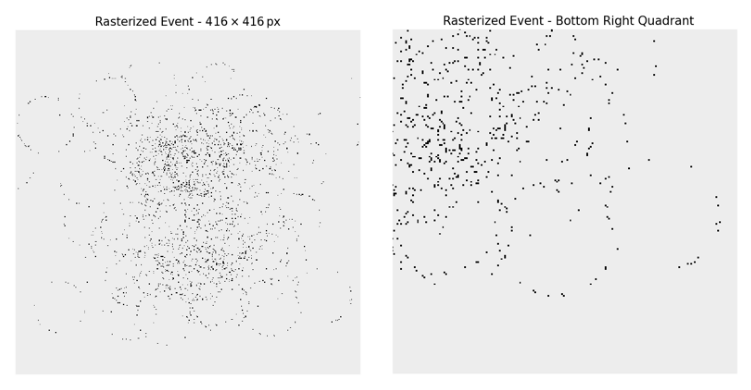

In [30]:
img1 = '/user/gr1/delphi/dghezzi/1.png'
img2 = '/user/gr1/delphi/dghezzi/2.png'

affianca_immagini_due(img1, img2)

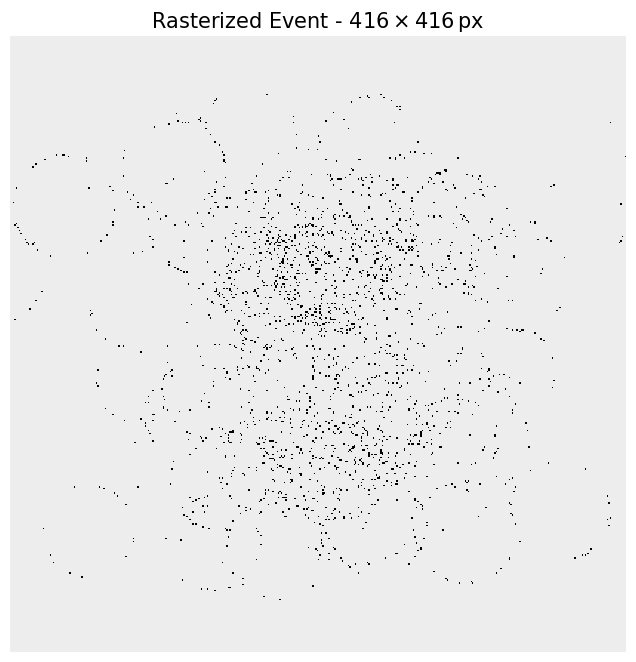

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Carico immagine
img = np.load('/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/416px/images/val/event_8.npy')

# Creo maschera binaria: 1 se sopra soglia, NaN altrimenti
mask = np.where(img > 0.00000000000001, 1, np.nan)

# Colormap: sfondo grigio chiaro semitrasparente, pixel in nero
cmap = ListedColormap(['lightgray', 'black'])
cmap.set_bad(color='lightgray', alpha=0.4)

# Mostro immagine
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(mask, cmap=cmap, vmin=0, vmax=1, interpolation='nearest')
plt.title(r'Rasterized Event - $416 \times 416 \,$px', fontsize=15)
plt.show()

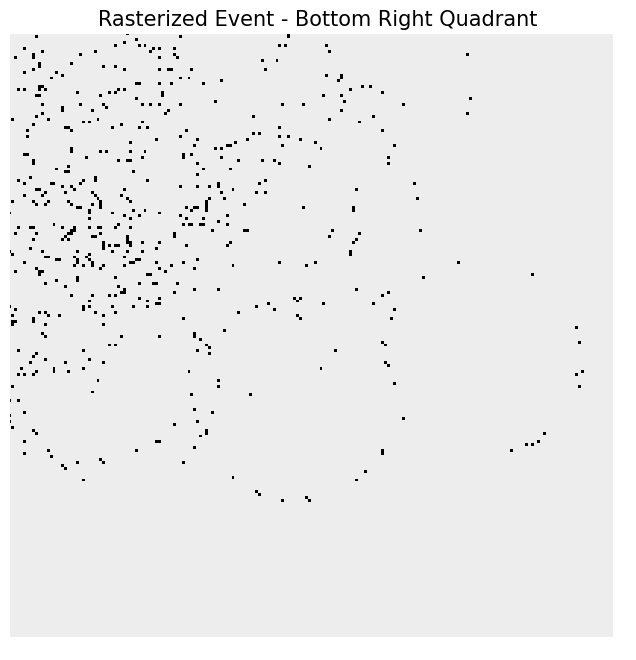

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Carico immagine
img = np.load('/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/416px/images/val/event_8.npy')

# Creo maschera binaria: 1 se sopra soglia, NaN altrimenti
mask = np.where(img > 1e-14, 1, np.nan)

# Colormap: sfondo grigio chiaro semitrasparente, pixel in nero
cmap = ListedColormap(['lightgray', 'black'])
cmap.set_bad(color='lightgray', alpha=0.4)

# Mostro immagine zoommata nel quadrante in basso a destra
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(mask, cmap=cmap, vmin=0, vmax=1, interpolation='nearest')

# Imposto limiti (x=colonne, y=righe)
plt.xlim(210, 420)   # da metà a destra
plt.ylim(420, 210)   # da metà a basso (inverto perché y cresce verso il basso)

plt.title(r'Rasterized Event - Bottom Right Quadrant', fontsize=15)
plt.show()
